# Shared Memory

In [1]:
from analyzer_functions import *
no_shared_path = '~/GPU-research/Preemptions/preemptions/times/shared/no_sharedSync100000.csv'
shared_50_path = '~/GPU-research/Preemptions/preemptions/times/shared/sharedSync100000-50.csv'
shared_100_path = '~/GPU-research/Preemptions/preemptions/times/shared/sharedSync100000-100.csv'


shared_paths = [shared_50_path, shared_100_path]
paths = [no_shared_path] + shared_paths

ivls = read_ivls(paths, single=False)

## Preemption and Execution

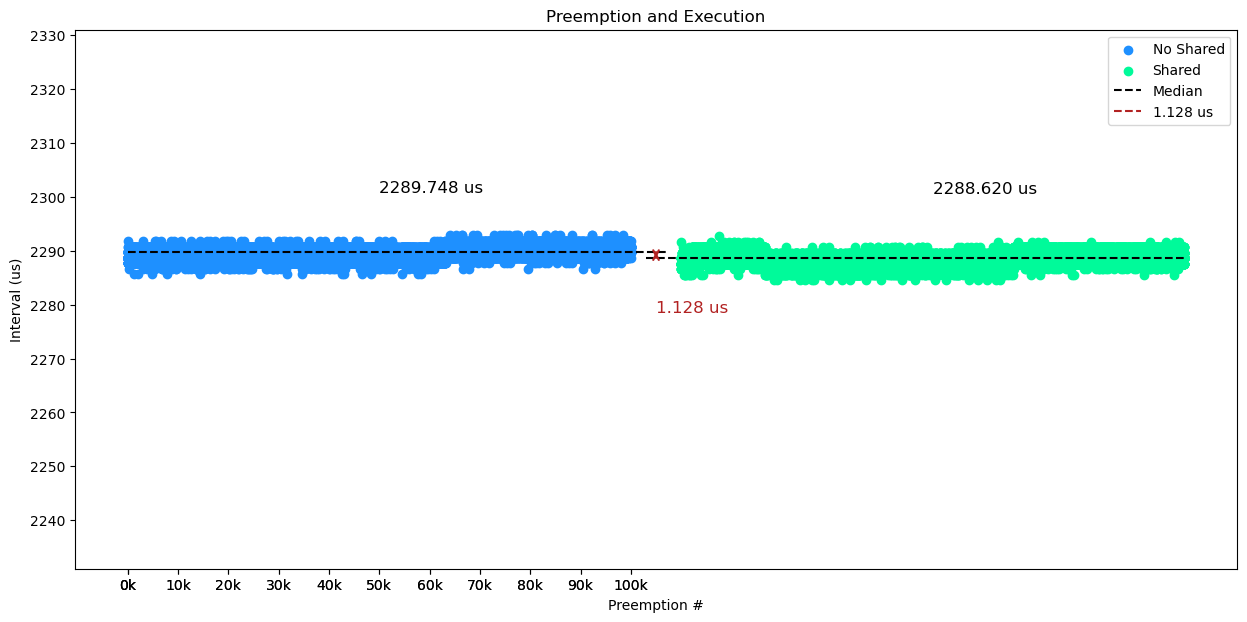

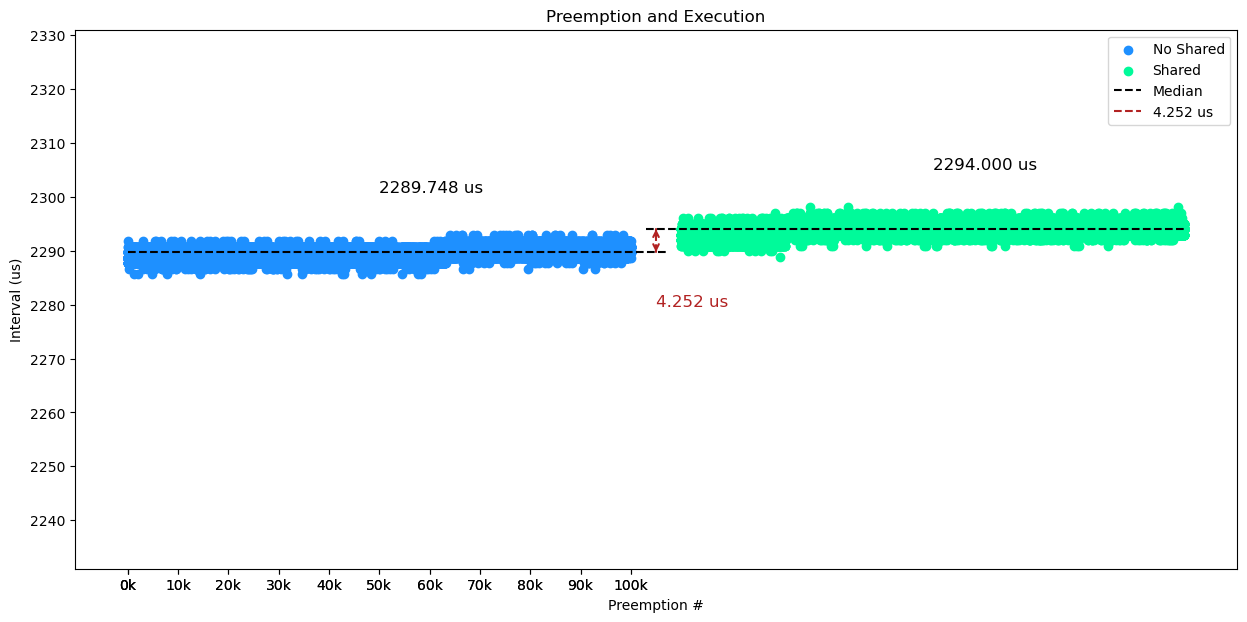

In [2]:
TIMESLICE_LENGTH = 2131
NUM_SAMPLES = 100000
OFFSET = NUM_SAMPLES // 10
shared_labels = ["Shared - 50%", "Shared - 100%"]
num_shared = len(shared_paths)
for i in range(num_shared):
	plot_side_by_side(noSharedData=ivls[0], sharedData=ivls[i+1], NUM_SAMPLES=NUM_SAMPLES, medianLines=True, lowerTextOffset=10, upperTextOffset=10, offset=OFFSET,
                  lowerBound=TIMESLICE_LENGTH+100, upperBound=TIMESLICE_LENGTH+200, firstLabel="No Shared", secondLabel="Shared", plotOverhead=False, oneSideTicks=True, thousand=True)

## Preemption Overhead

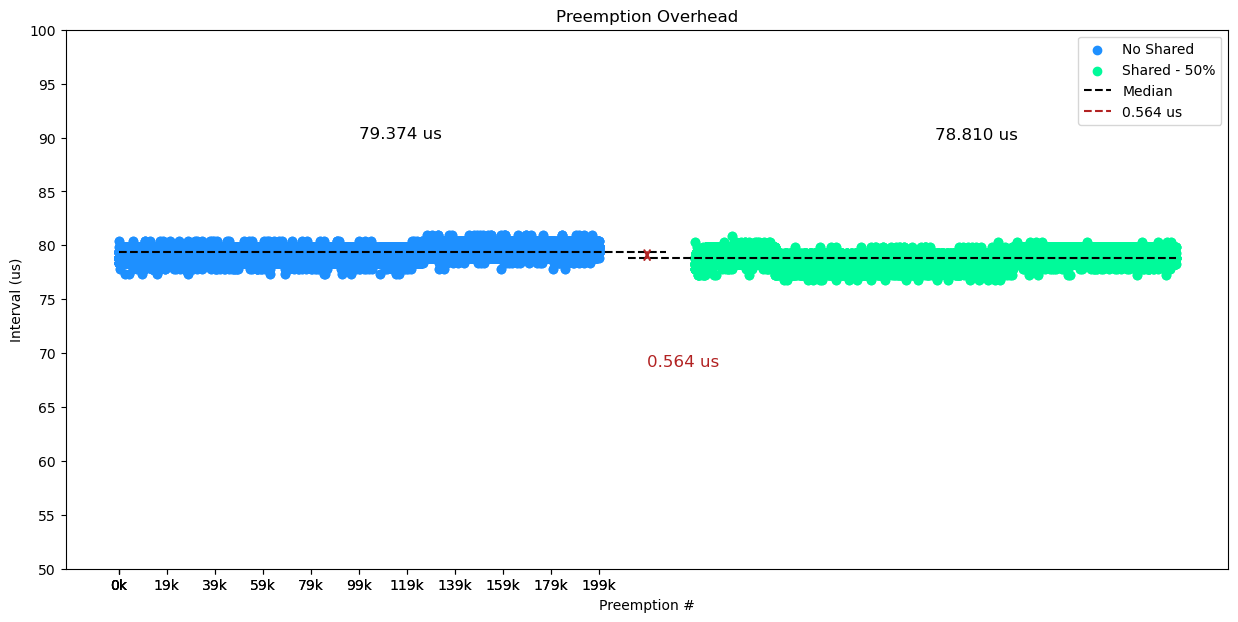

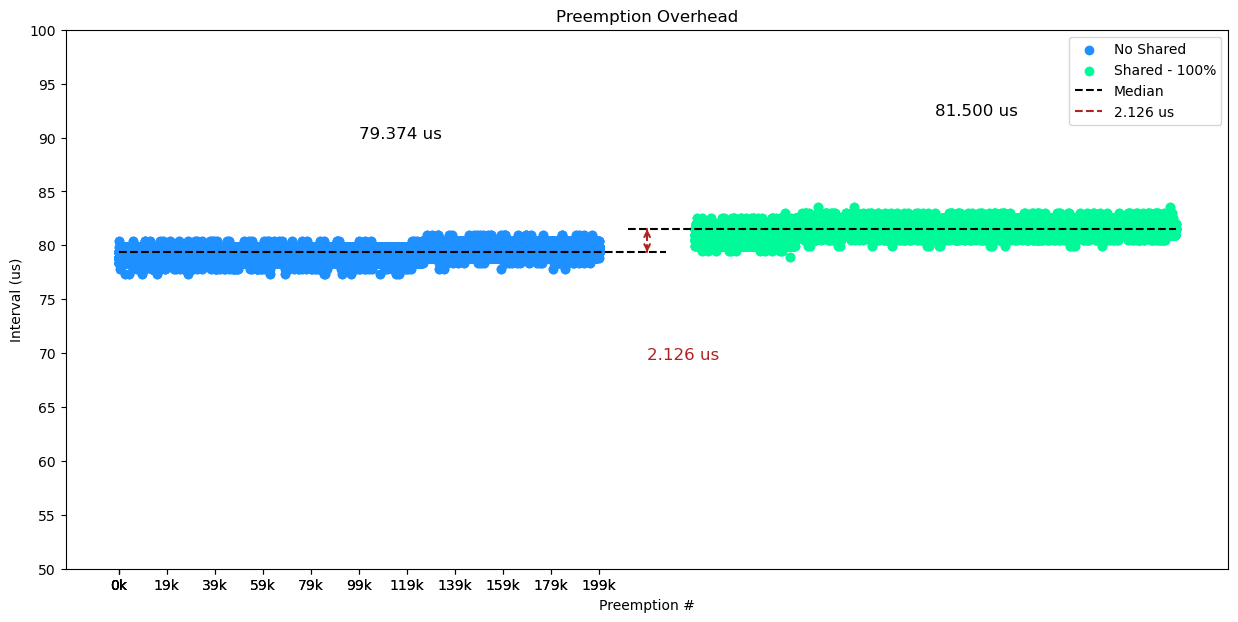

In [3]:
no_shared_oh = get_overhead(ivls[0], timeslice_length=TIMESLICE_LENGTH)
shared_ohs = [0] * num_shared
OFFSET *= 4
num_oh = NUM_SAMPLES*2 - 2
for i in range(num_shared):
	shared_ohs[i] = get_overhead(ivls[i+1], timeslice_length=TIMESLICE_LENGTH)
	plot_side_by_side(noSharedData=no_shared_oh, sharedData=shared_ohs[i], NUM_SAMPLES=num_oh, medianLines=True, oneSideTicks=True, offset=OFFSET,
                  lowerBound=50, upperBound=100, firstLabel="No Shared", secondLabel=shared_labels[i], plotOverhead=True, thousand=True,
					lowerTextOffset=10, upperTextOffset=10)